In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import sys
sys.path.append('../src/safe_mpc')
import plut

In [16]:
#folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/datauniform/2024-07-27_15-43-42PARTIAL_CONDENSING_HPIPM100800parallelnewx0'
#folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/data/2024-07-27_15-27-16PARTIAL_CONDENSING_HPIPM100800regedingnewx0'
#folder = '/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/data/2024-07-29_10-21-42PARTIAL_CONDENSING_HPIPM100800'
#folder= '/home/utente/Documents/Optim/dat_opt/parallelJmp-1CorrectionAlw'
#folder= '/home/utente/Documents/Optim/DATI/datix0old/old/parallelCheckSafeIntGuessCorrection5e-4'
data = {}
for i in os.listdir(folder):
    if i[-4:]=='.pkl':
        with open(folder+'/'+i,'rb') as f:
            data[i[:-4]] = pickle.load(f)

In [2]:
folder2= '/home/utente/Documents/Optim/DATI/Datix0old/old/recedingGuessCorrectionNoCHeck'
data2 = {}
for i in os.listdir(folder2):
    if i[-4:]=='.pkl':
        with open(folder2+'/'+i,'rb') as f:
            data2[i[:-4]] = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/utente/Documents/Optim/DATI/Datix0old/old/recedingGuessCorrectionNoCHeck'

In [7]:
os.listdir(folder)
with open(folder+'/coreused.pkl','rb') as f:
    ata = pickle.load(f)


In [8]:
data.keys()

dict_keys(['errors', 'safehor_hist', 'x_u', 'coreused', 'error_jump', 'jumps'])

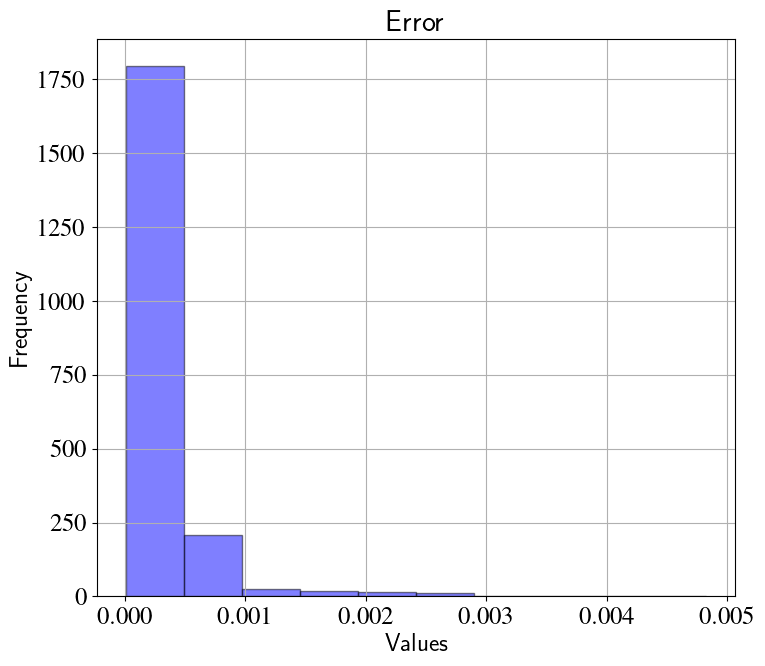

array([3.89714986e-05, 2.15632923e-05, 1.07743046e-05, ...,
       6.46929055e-04, 3.48629197e-04, 2.17043003e-04])

In [15]:
err = [item for sublist in data['errors'] for item in sublist]
err=np.array(err).flatten()
err=err[~np.isnan(err)]
bound_l = 1e-1
bound_h = 10
err = err[err >=1e-5]
#err = err[err<bound_h]

#bin_edges = np.linspace(bound_l,bound_h, num=10)
plt.hist(err,density=True,bins=10, color='blue', alpha=0.5, edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Error')
 
# Display the plot
plt.show()

err

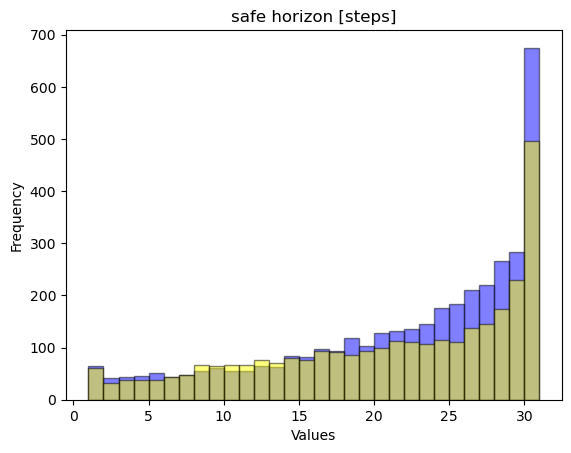

In [18]:
horizon_safe = []
for i in range(len(data['safehor_hist'])):
    for j in range(len(data['safehor_hist'][i])):
        horizon_safe.append(data['safehor_hist'][i][j])
horizon_safe=np.array(horizon_safe)

horizon_safe_rec =[]
for i in range(len(data2['safehor_hist'])):
    for j in range(len(data2['safehor_hist'][i])):
        horizon_safe_rec.append(data2['safehor_hist'][i][j])
horizon_safe_rec=np.array(horizon_safe_rec)


plt.hist(horizon_safe[horizon_safe<32],density=False, bins=30,color='blue', alpha=.5, edgecolor='black')
plt.hist(horizon_safe_rec[horizon_safe_rec<32],density=False, bins=30,color='yellow' ,alpha=.5,edgecolor='black')

 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('safe horizon [steps]')
 
# Display the plot
plt.show()


In [19]:
print(np.mean(horizon_safe_rec))
print(np.mean(horizon_safe))

28.614789446981227
28.304746240601503


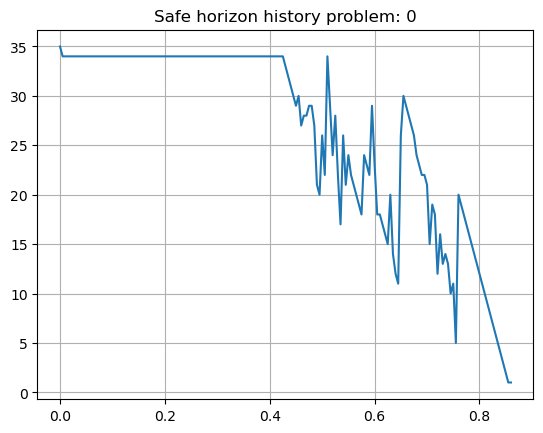

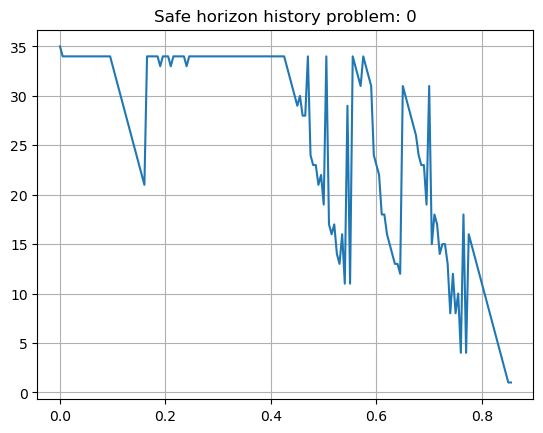

In [25]:
n=0
plotted=data['safehor_hist'][n]

plt.figure()
plt.title(f'Safe horizon history problem: {n}')
plt.grid(True)
plt.plot(np.arange(0,len(plotted))*5e-3,plotted)
plt.show()
plt.close()

plotted=data2['safehor_hist'][n]

plt.figure()
plt.title(f'Safe horizon history problem: {n}')
plt.grid(True)
plt.plot(np.arange(0,len(plotted))*5e-3,plotted)
plt.show()
plt.close()

In [80]:
for i in range(len(data['safehor_hist'])):
    minimumhor = min(data['safehor_hist'][i])
    if minimumhor<10:
        print(f'problem {i} minimum {minimumhor}')

problem 24 minimum 9
problem 31 minimum 8
problem 92 minimum 7
problem 96 minimum 1


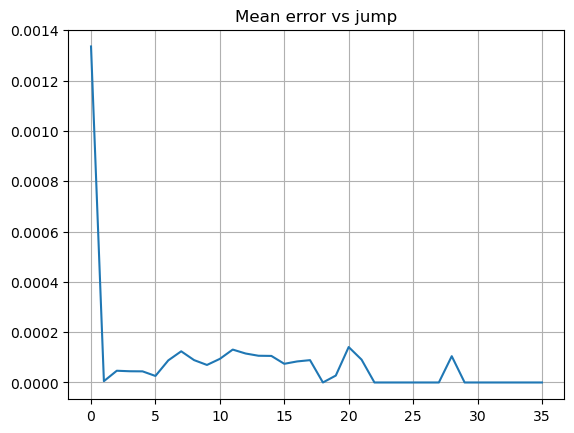

In [86]:
mean_error_jump  = [sublist if sublist else [0] for sublist in data['error_jump']]
for i in range(len(mean_error_jump)):
   a = np.array(mean_error_jump[i])
   a = a[~np.isnan(a)]
   mean_error_jump[i] = np.mean(a)


plt.figure()
plt.title('Mean error vs jump')
plt.grid(True)
plt.plot(mean_error_jump)
plt.show()
plt.close()

In [11]:
len(mean_error_jump)

35

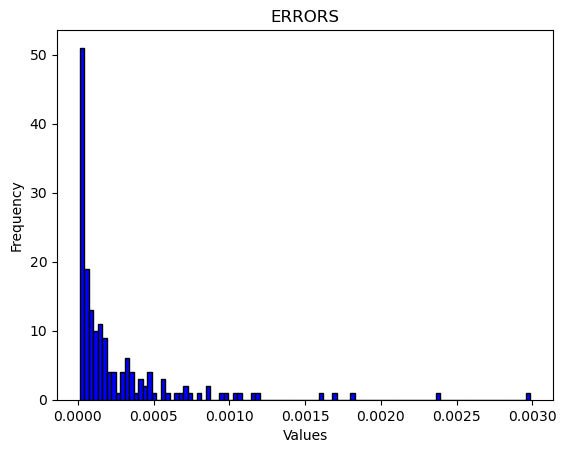

In [82]:
n_jump=2
err_jump=np.array(data['error_jump'][n_jump]).flatten()
err_jump=err_jump[~np.isnan(err_jump)]
err_jump = err_jump[err_jump > 1e-5]

plt.hist(err_jump, bins=100, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('ERRORS')
 
# Display the plot
plt.show()


# più errori perchè più step affrontati

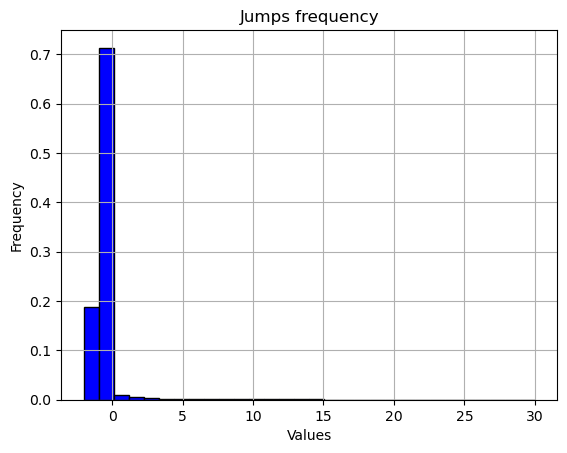

-0.008970727101038715

In [106]:
jumps = np.array(data['jumps']) 
#jumps=jumps[jumps>0]
plt.hist(jumps,density=True, bins=30,range=[-2, 30], color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Jumps frequency')
plt.grid(True)
 
# Display the plot
plt.show()

max(jumps)
np.mean(jumps)

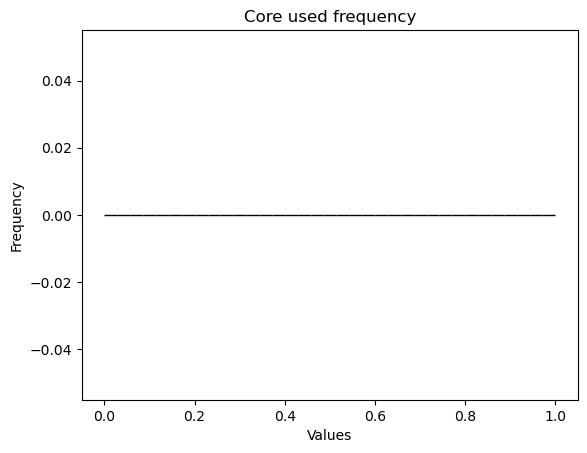

ValueError: min() arg is an empty sequence

In [63]:
core = np.array(data['coreused'])
plt.hist(core[core<=36], bins=35, color='blue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Core used frequency')
 
# Display the plot
plt.show()

min(core)

In [50]:
data['coreused']

[]

In [14]:
xu = data['x_u']
x0=[]
x=xu['x_sim']
tot=0
for i in range(len(x)):
    tot+=len(x[i])
    x0.append(x[i][0][0])
tot

9547

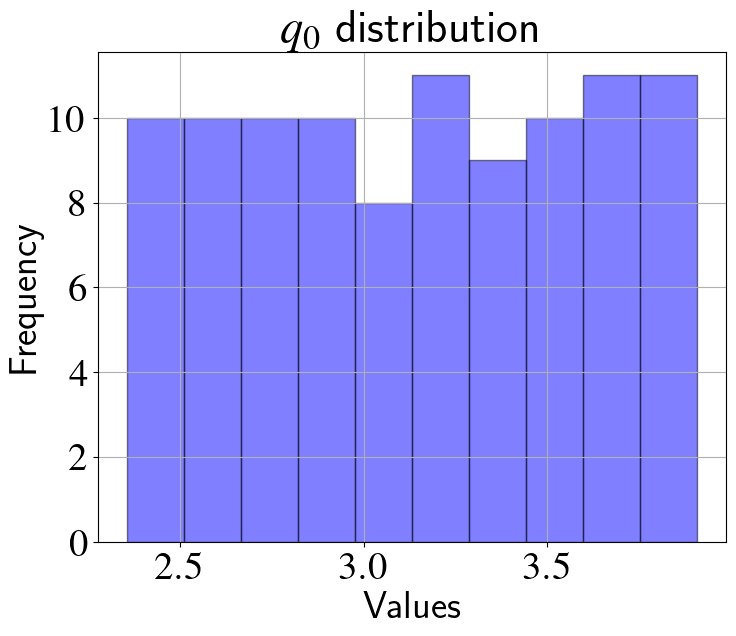

In [19]:
plt.hist(x0, bins=10, color='blue', alpha=.5, edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(r'$q_0$ distribution')
plt.savefig('q0old')
# Display the plot
plt.show()

In [28]:
import numpy as np
import matplotlib.pyplot as plt
x0resampled=np.load('/home/utente/Documents/Optim/safe-mpc/data/x_init_15.npy')

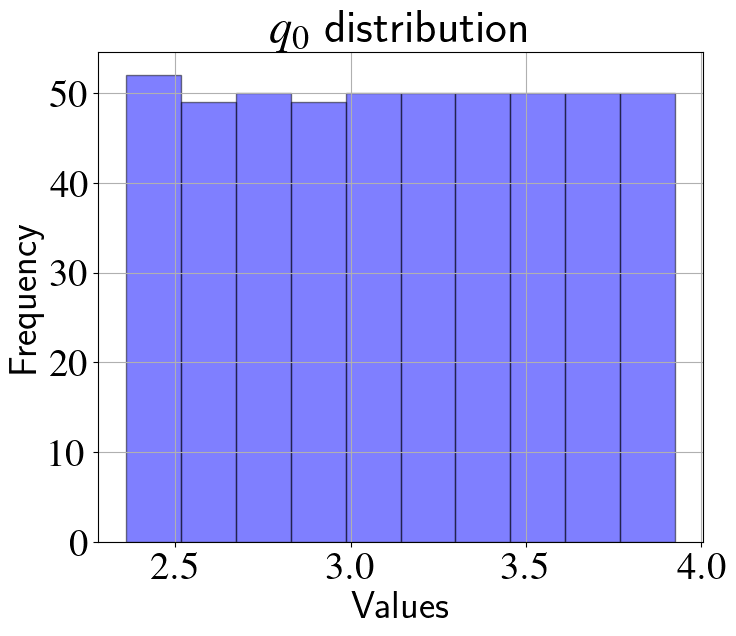

In [31]:
plt.hist(x0resampled[:,0], bins=10, color='blue', edgecolor='black',alpha=.5)
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title(r'$q_0$ distribution')
plt.savefig('q0-new')
# Display the plot
plt.show()

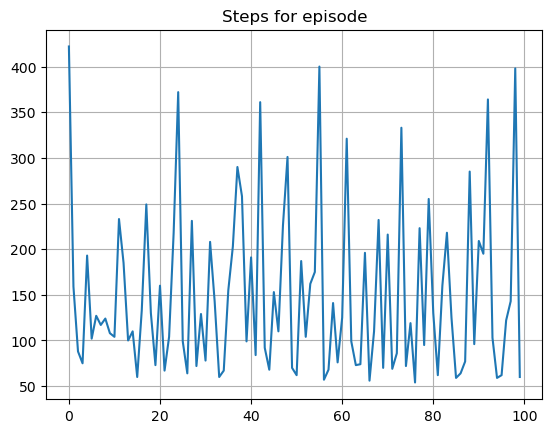

In [88]:
episode_len=[]
for i in range(len(data['safehor_hist'])):
    episode_len.append(len(data['safehor_hist'][i]))

plt.figure()
plt.title('Steps for episode')
plt.grid(True)
plt.plot(episode_len)
plt.show()
plt.close()

In [96]:
x = data['x_u']
u = data['x_u']

In [98]:
folder_name = os.getcwd()+'/plots29-07'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
folder_name

'/home/utente/Documents/Optim/mpc-dock-default2/safe-mpc/scripts/plots29-07'

In [103]:
nplot = 0
for i in range(0,100):    

    x_plt=np.array(x['x_sim'][nplot])
    u_plt=np.array(u['u_sim'][nplot])

    plt.figure(figsize=(10, 10))
    plt.title('HPIPM')
    plt.subplot(1, 2, 1)    
    plt.grid(True)
    plt.plot(np.arange(0,len(x_plt[:,0]))*5e-3,x_plt[:,0])
    plt.subplot(1, 2, 2)    
    plt.grid(True)
    plt.plot(np.arange(0,len(x_plt[:,3]))*5e-3,x_plt[:,3])
    plt.savefig(os.path.join(folder_name, str(nplot)+'hpipm'+'.png'))
    plt.close()


    plt.figure()
    plt.title('HPIPM u')
    plt.grid(True)
    plt.plot(np.arange(0,len(u_plt[:,0]))*5e-3,u_plt[:,0],label='u1')
    plt.plot(np.arange(0,len(u_plt[:,0]))*5e-3,u_plt[:,1],label='u2')
    plt.plot(np.arange(0,len(u_plt[:,0]))*5e-3,u_plt[:,2],label='u3')
    plt.legend()
    plt.savefig(os.path.join(folder_name, 'u'+str(nplot)+'hpipm'+'.png'))
    plt.close()

    nplot +=1